# Python Exercise 07

## Exercise 1

1. Go to this website: https://www.komplett.dk/category/21640/gaming/spiludstyr/gaming-headset?nlevel=10431%C2%A721603%C2%A721640&sort=OrderedTimes_bf%3ADESCENDING&hits=192
2. Use BeautifulSoup, to select the name, price, amount of stars (review related) and amount in stock.
3. Save the data, to be used for later.

## Exercise 2

1. Using Regular Expressions and the data from exercise 1, find all headset which is in stock.
2. Create a list of tuples with the data from subtask 1.

## Exercise 3

1. Use the data from Exercise 2, to make a sorted bar chart of the headsets, where x-axis is names, and y-axis is price.

#### Made by NewBiz:

- Nicklas Nielsen (cph-nn161@cphbusiness.dk)
- Mathias Haugaard (cph-mn556@cphbusiness.dk)
- Nikolaj Larsen (cph-nl174@cphbusiness.dk)

## Status
Exercise 1 is completed. <br>
There were some problems with getting the headsets in stock in exercise 2. <br>
The bar plot in exercise 3 is sorted but not correctly.

In [1]:
import bs4
import requests

r = requests.get('https://www.komplett.dk/category/21640/gaming/spiludstyr/gaming-headset?nlevel=10431%C2%A721603%C2%A721640&sort=OrderedTimes_bf%3ADESCENDING&hits=192')
r.raise_for_status()

In [2]:
soup = bs4.BeautifulSoup(r.text, 'html.parser')
names = soup.select('h2')
prices = soup.select('span[class="product-price-now"]')
stars = soup.select('div[class="review"]')
stocks = soup.select('span[class="stockstatus-stock-details"]')

In [3]:
name_list = []
price_list = []
for idx, val in enumerate(names):
    name_list.append(names[idx].getText())
    price_list.append(prices[idx].getText())
    
name_and_price = dict(zip(name_list, price_list))

In [4]:
import re
in_stock = re.compile(r'(stk. på lager)')
in_stock_all = in_stock.findall(str(stocks))
print(in_stock_all)

['stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lage

<BarContainer object of 182 artists>

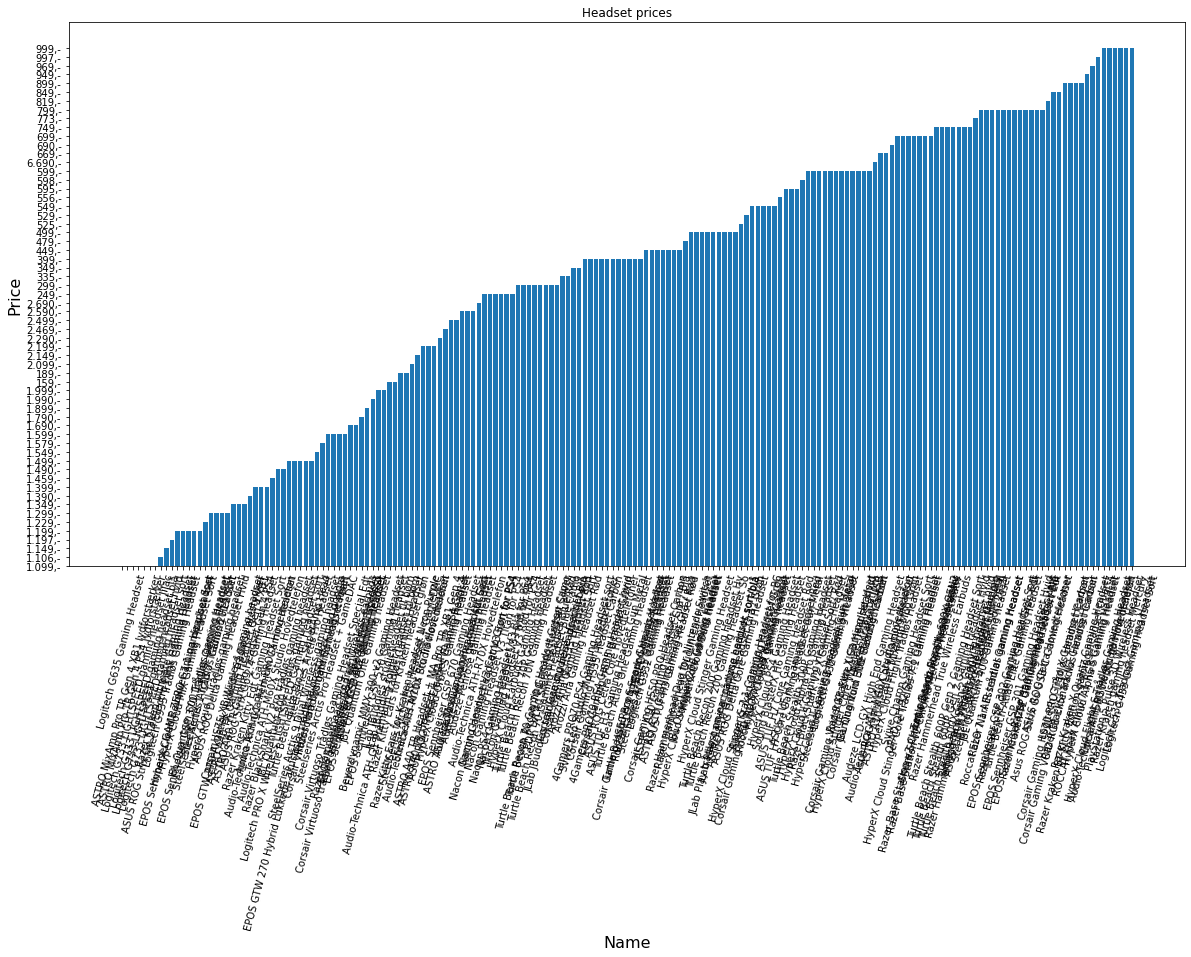

In [5]:
import matplotlib.pyplot as plt

sorted_dict = {k: v for k, v in sorted(name_and_price.items(), key=lambda item: item[1])}

x = list(sorted_dict.keys())
y = list(sorted_dict.values())
plt.figure(figsize=(20,10))
plt.xticks(rotation=75)
plt.title("Headset prices", fontsize=12)
plt.xlabel("Name", fontsize=16)
plt.ylabel("Price", fontsize=16)

plt.bar(x,y)